# 2.0: Ill-posed problems and regularization - Shaw's problem

*Written by Malcolm Sambridge.*

<!--<badge>--><a href="https://colab.research.google.com/github/msambridge/InversionPracticals/blob/main/Solutions/S2.0 - Ill-posed problems and regularization-solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

When light passes through a thin slit it is diffracted. The 
distribution of light intensity as a function of incidence angle $\theta$ is represented by 
$m(\theta)$. After passing through the slit it becomes $d(\phi)$, where $\phi$ is the angle as defined in the 
figure.

<img src="Figures/shaw.png" alt="Diffraction of a light beam passing through a thin slit." width="300"/>



The intensity before, $m(\theta)$, and after, $d(\phi)$, passing through the slit and  are related by the expression


$$
d(\phi) = \int_{-\pi/2}^{\pi/2} (\cos(\phi) + \cos(\theta))^2 \left( 
{\sin(\pi(\sin(\phi) + \sin(\theta)))\over\pi(\sin(\phi) + \sin(\theta))}
\right)^2m(\theta)d\theta
$$


Here the data are measured intensity $d(\phi)$ at N equal intervals, 

$$d(\phi_i) = d_i, (i=1,\dots,N)$$

where $- \frac{\pi}{2} <= \phi_i <= \frac{\pi}{2}$, and the model is the incident intensity $m(\theta)$ discretized over the same angular intervals, 

$$m(\theta_j) = m_j, (j=1,\dots,N).$$

This leads to a discrete linear system of $N\times N$ equations, ${\bf d} = G {\bf m}$, where

$$
G_{i,j} = \Delta \phi (\cos(\phi_i) + \cos(\theta_j))^2 \left( 
{\sin(\pi(\sin(\phi_i) + \sin(\theta_j)))\over\pi(\sin(\phi_i) + \sin(\theta_j))}
\right)^2
$$

As we shall see, the resulting inverse problems is severely ill-posed. Routine `G,m,d=shaw(20)` computes the G matrix along with a sample model and data for this problem with $N=20$. 


#### Reference
C. B. Shaw, Jr., "Improvements of the resolution of an instrument by numerical solution of an integral equation", *J. Math. Anal. Appl.* 37 (1972), 83-112. 

----------

First load some libraries.

In [11]:
# -------------------------------------------------------- #
#                                                          #
#     Uncomment below to set up environment on "colab"     #
#                                                          #
# -------------------------------------------------------- #

# !git clone https://github.com/msambridge/InversionPracticals
# %cd InversionPracticals

In [12]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import sys
sys.path.append("software")
import plotcovellipse as pc
from shaw import shaw, pseudo_inverse

In [13]:
n = 18      # number of points to discretize the model and data functions
G = shaw(n) # Calculate the G matrix for this discretization

Here we defne a simple test model $m(\theta)$ consisting of a single spike.

In [14]:
spikemodel = np.zeros(n)
spikecentre = int(n/2)                              # location of spike
spikemodel[spikecentre] = 1.                        # amplitude of spike model
spikeangles = -np.pi/2+np.arange(.5,n+.5,1)*np.pi/n # angles of input 

And now lets plot the test model.

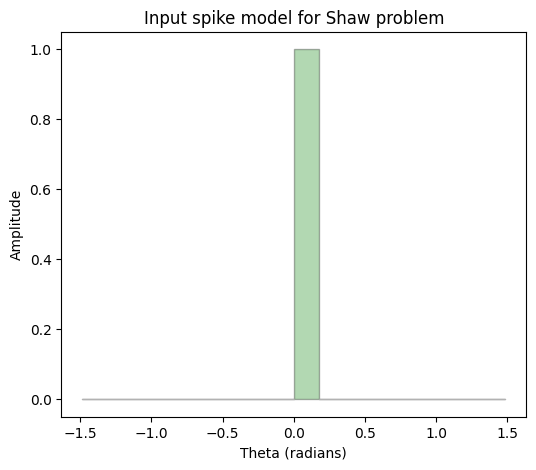

In [15]:
fig, ax = plt.subplots(figsize=(6,5))
plt.fill_between(spikeangles, spikemodel,step='mid',alpha=0.3,color='green',edgecolor='k')
plt.title('Input spike model for Shaw problem')
plt.xlabel('Theta (radians)')
plt.ylabel('Amplitude')
plt.show()

Now lets calculate the corresponding data for the spike test model for each angle, $d(\phi)$, and plot it.

In [16]:
spikedata = np.dot(G,spikemodel)

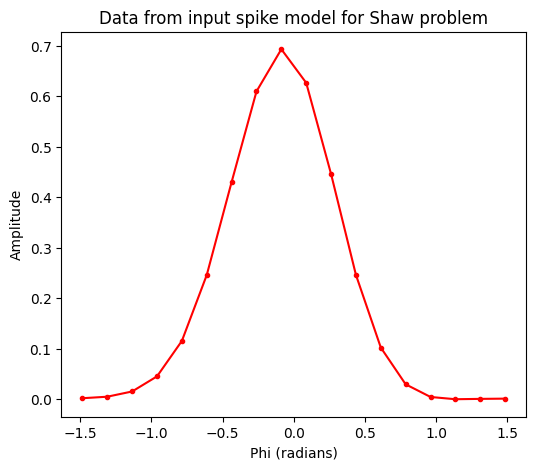

In [17]:
fig, ax = plt.subplots(figsize=(6,5))
plt.plot(spikeangles,spikedata,'r.-',label='Spike data')
plt.title('Data from input spike model for Shaw problem')
plt.xlabel('Phi (radians)')
plt.ylabel('Amplitude')
plt.show()

**Task 1** Calcuate the Least squares solution and plot it. For this dataset the true solution is the test spike model. How does this solution compare in terms of amplitude and shape?

Hint: The routine `sol = LSsolver(data,G)` will be useful here.

In [18]:
def LSsolver(y,G,Cdinv=None):
    if(Cdinv==None): Cdinv = np.eye(len(y))
    A = np.dot(np.transpose(G), Cdinv)
    GtG = np.dot(A, G) # G^T C_inv G^T
    GtGinv = np.linalg.inv(GtG) # Inverse of G^TC_inv G
    B = np.dot(A,y)
    mls = np.dot(GtGinv, B) # Least squares solution 
    return mls

In [19]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



### Singular value decomposition

Any matrix $N\times M$ matrix $G$ can be written in terms of its singular value decomposition. 

$$
G = U S V^T,
$$
where 

$V$ is the $M\times M$ matrix of orthogonal singular vectors spanning the model parameter space;

$U$ is the $N\times N$ matrix of orthogonal singular vectors spanning the data space;

and $S_p$ is the $M\times N$ matrix with all zeros except the $p$ singular values of $G$ along its first diagonal.

If $p$ is the rank of the matrix $G$, then this immediately reduces to 
$$
G = U_p S_p V_p^T,
$$
where $U_p$ is the $N\times p$ matrix formed by taking the first $p$ columns of $U$; $V_p$ is the $M\times p$ matrix formed by taking the first $p$ columns of $V$; and $S_p$ is the diagonal $p\times p$ matrix of singular values, $s_i, (i=1,\dots,p)$ of the matrix $G$.

In python, the command `U,s,Vt = np.linalg.svd(G)` will calculate the singular vectors as matrices $(U,V)$ and singular values . (Here Vt is the transpose of V.) 

**Task 2** Calculate the singular values of the $G$ matrix. Plot singular values $s_i$ as a function of index $i$ on a semi-log plot using `plt.semilogy()`. What do you notice about the shape ?

In [20]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 3** Calculate the rank and condition number of $G$.

Hint: numpy has a routine for this, `np.linalg.matrix_rank(A)` gives the rank of the matrix A; while
`np.linalg.cond(A)` gives it conidtion number.

What do these terms mean ? How do these terms depend on the singular values, $s$ ? 

In [21]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



#### The pseudo inverse of $G$

The pseudo inverse solution of ${\mathbf d} = G {\mathbf m}$ is given by 
$$
{\mathbf m}^{\dagger} = G^{\dagger}{\mathbf d},
$$
where $G^{\dagger}$ is the pseudo inverse of the matrix $G$
$$
G^{\dagger} = V_p S_p^{-1} U_p^T,
$$

For the Shaw problem the discretization of data and model functions is the same and so $M=N$. For convenience the routine `Gdagger = pseudo_inverse(G,k)` returns the pseudo inverse of $G$ using the first $k$ singular values.

**Task 4** Calculate the pseduo inverse and apply it to the spike data to tray and recover the spike model. Do this using all 18 singular values.

In [22]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 5** Now add a very small amount of IID Gaussian random noise to the data with zero mean ${\cal N}(0,\sigma^2I_N)$ and plot the original data together with the noisy data. Choose $\sigma=10^{-6}$.

Is there any discernable difference between the noiseless and the noisy data?

In [23]:
sigma = 1.0E-6 # small standard deviation of noise.
spikedata_noisy = spikedata + np.random.multivariate_normal(np.zeros(n), (sigma**2)*np.eye(n))

In [24]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



Now plot the noisy and perfect data together.

**Task 6** Now calculate the solution using the pseudo inverse solution for the noisy data. Plot it together with the true spike model. What do you notice?

In [25]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 7** To see where this shape comes from plot the singular vector for the smallest singular value included in the solution. This would be the 18th singular vector, or the 18th column of the matrix $V$.

In [26]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 8** Now plot singular vectors for the 1st, 5th, 11th and 18th singular values.

In [27]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 9** Find a $p$ value for which you judge the pseudo inverse solution best recovers the true spike model. By reducing the maximum number of singular values in the solution,  what have you managed to do to the inverse problem? What has been sacrificed to achieve this?

In [28]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



#### Uncertainty in the pseudo solution

The model covariance matrix for the pseudo inverse is given by

$$
C_M = G^{\dagger} C_D (G^{\dagger})^T =  \sigma^2 G^{\dagger} (G^{\dagger})^T = \sigma^2 V_p S^{-2} V_p^T
$$


**Task 10** Calculate the model covariance matrix for your chosen value of $p$ and plot the 95% confidence intervals for each parameter as upper and lower bounds about your chosen solution. Note that the 95% confidence interval about the $i$th model parameter value is given by $\pm 1.96*[(C_M)_{i,i}]^{1/2}$, i.e. the square root of the corresponding diagonal element of $C_M$.



How do these error bars compare to the distance between your estimated and true spike model solution?

In [29]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

